# Detection of components in PID diagrams

### Imports

In [2]:
import os
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

### Paths definitions

In [3]:
outputPath = 'out'
imagesInputPath = os.path.join('..', 'PatternImages')
outputTrainingPath = os.path.join(outputPath, 'train')
outputTestPath = os.path.join(outputPath, 'test')

### Generation of the training and test dataset

In [4]:
cd /u01/notebooks/TFM/DatasetCreator

/u01/notebooks/TFM/DatasetCreator


Import of the program of automatic generation of images

In [5]:
from datasetCreate import DatasetCreate

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


Define the number of training and test images that we want to generate

In [6]:
trainingImagesNumber = 50
testImagesNumber = 5
dc = DatasetCreate(imagesInputPath, outputPath)

Generating training images

In [7]:
dc.generateDataset(trainingImagesNumber, outputTrainingPath, os.path.join(outputPath, 'train.record'))

diagram1.jpg | Diagram size: 7x25 cells | Cell size: 241 | numComponents: 17
diagram2.jpg | Diagram size: 13x12 cells | Cell size: 316 | numComponents: 15
diagram3.jpg | Diagram size: 25x23 cells | Cell size: 193 | numComponents: 57
diagram4.jpg | Diagram size: 16x17 cells | Cell size: 231 | numComponents: 27
diagram5.jpg | Diagram size: 9x20 cells | Cell size: 233 | numComponents: 18
diagram6.jpg | Diagram size: 19x17 cells | Cell size: 304 | numComponents: 32
diagram7.jpg | Diagram size: 24x14 cells | Cell size: 235 | numComponents: 33
diagram8.jpg | Diagram size: 17x21 cells | Cell size: 346 | numComponents: 35
diagram9.jpg | Diagram size: 9x21 cells | Cell size: 72 | numComponents: 18
diagram10.jpg | Diagram size: 19x28 cells | Cell size: 115 | numComponents: 53
diagram11.jpg | Diagram size: 23x13 cells | Cell size: 207 | numComponents: 29
diagram12.jpg | Diagram size: 20x24 cells | Cell size: 236 | numComponents: 48
diagram13.jpg | Diagram size: 24x15 cells | Cell size: 302 | numC

Generating test images

In [8]:
dc.generateDataset(testImagesNumber, outputTestPath, os.path.join(outputPath, 'test.record'))

diagram1.jpg | Diagram size: 22x15 cells | Cell size: 115 | numComponents: 33
diagram2.jpg | Diagram size: 26x30 cells | Cell size: 280 | numComponents: 78
diagram3.jpg | Diagram size: 29x27 cells | Cell size: 280 | numComponents: 78
diagram4.jpg | Diagram size: 22x25 cells | Cell size: 281 | numComponents: 55
diagram5.jpg | Diagram size: 27x7 cells | Cell size: 219 | numComponents: 18
Successfully created the TFRecords: /u01/notebooks/TFM/DatasetCreator/out/test.record


Generate pbtxt file with  labels

In [9]:
dc.generatePbtxt()

Check image generate

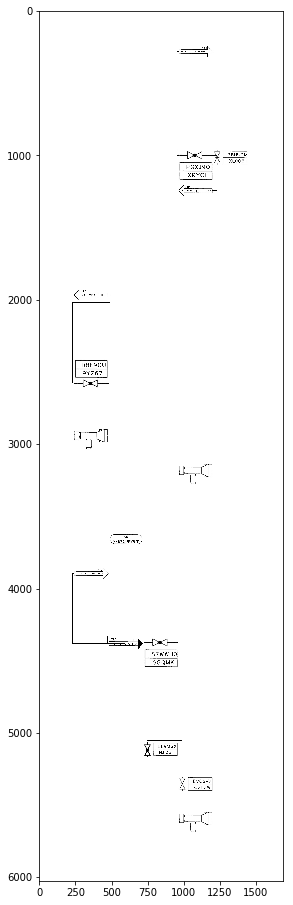

In [11]:
image = Image.open('out/train/diagram1.jpg')
plt.figure(figsize=(24, 16))
plt.imshow(image, cmap='Greys_r')

### Training model

To train model in Google Cloud go to [GoogleCloudAITrainingConfig](GoogleCloudAITrainingConfig.ipynb) notebook

In [12]:
cd /u01/notebooks/models/research/

/u01/notebooks/models/research


Launch tensorflow object detection 

In [13]:
!python object_detection/model_main.py  \
--pipeline_config_path=/u01/notebooks/TFM/Configs/rfcn_resnet101.config  --model_dir=/u01/notebooks/trainingmodel \
--num_train_steps=10000  \
--num_eval_steps=500   \
--alsologtostderr


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use `tf.data.experimental.parallel_interleave(...)`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use `tf.data.Dataset.batch(..., drop_remainder=True)`.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

/root/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-06-02 05:37:08.854002: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-06-02 05:37:08.858149: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 1976240000 Hz
2019-06-02 05:37:08.858340: I tensorflow/co

### Export training model

In [9]:
cd /u01/notebooks/models/research/

/u01/notebooks/models/research


In [23]:
!python object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/u01/notebooks/TFM/Configs/rfcn_resnet101.config \
    --trained_checkpoint_prefix=/u01/notebooks/trainingmodel/model.ckpt-0 \
    --output_directory=/u01/notebooks/exportmodel

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
Please switch to tf.train.get_or_create_global_step
Instructions for updating:
Use `tf.profiler.profile(graph, run_meta, op_log, cmd, options)`. Build `options` with `tf.profiler.ProfileOptionBuilder`. See README.md for details
Instructions for updating:
Use tf.compat.v1.graph_util.remove_training_nodes
316 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops     

316 ops no flops stats due to incomplete shapes.
Parsing Inputs...
Incomplete shape.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          .*BatchNorm.*,.*Initializer.*,.*Regularizer.*,.*BiasAdd.*
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================
Incomplete shape.

Doc:
scope: The nodes in the model graph are organiz

  SecondStageBoxPredictor/map_1/while/add_37 (1/1 flops)
  SecondStageBoxPredictor/mul (1/1 flops)
  SecondStageBoxPredictor/mul_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/Less (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/Less_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/sub (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/sub_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/truediv (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/ChangeCoordinateFrame/truediv_1 (1/1 flops)
  SecondStagePostprocessor/BatchMultiClassNonMaxSuppression/map/while/MultiClassNonMaxSuppression/Greater (1/1 flops)
  Secon

### Test model

In [14]:
import matplotlib
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import tensorflow as tf
import cv2
import numpy as np

Paths definitions

In [15]:
cd /u01/notebooks/TFM/DetectionComponentsAPI

/u01/notebooks/TFM/DetectionComponentsAPI


In [16]:
# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = 'frozen_inference_graph.pb'

# Path to label map file
PATH_TO_LABELS = 'label_map.pbtxt'

# Path to image
PATH_TO_IMAGE = '/u01/notebooks/TFM/TestImages/diagram2.jpg'

# Number of classes the object detector can identify
NUM_CLASSES = 13

In [17]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [18]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

sess = tf.Session(graph=detection_graph)

In [19]:
# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

In [20]:
image = cv2.imread(PATH_TO_IMAGE)
image_expanded = np.expand_dims(image, axis=0)

In [21]:
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

In [22]:
vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
min_score_thresh=0.70)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

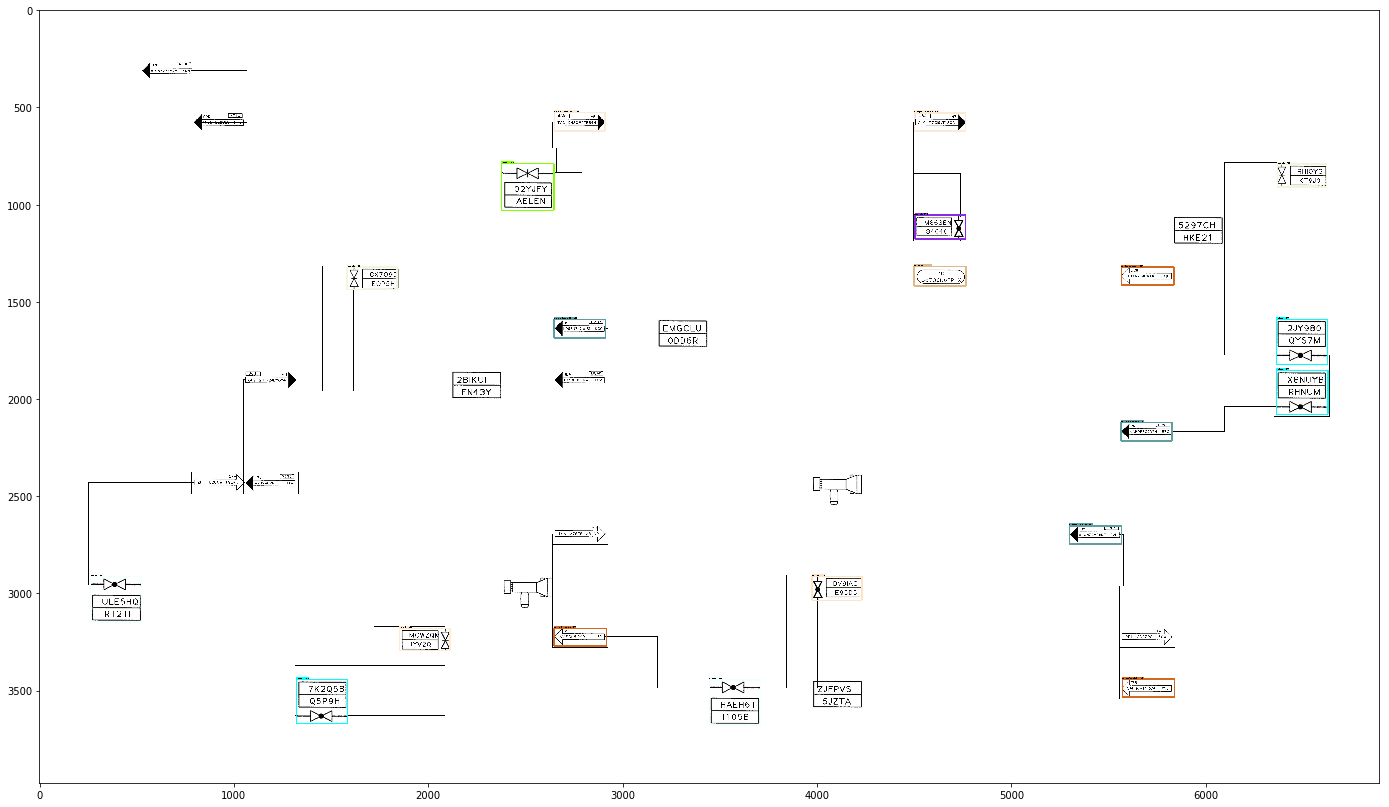

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(24, 16))
plt.imshow(image)